<h2>BMIF201 Lecture 5 in-class problem set instructions</h2>

This problem set investigates the ways in which selection interacts with linkage. 

<h5> Problem 1 </h5>

Write a Wright-Fisher simulator with two partially linked loci and many possible alleles at each locus. To do this, you will need to simulate individual haplotypes instead of just allele frequencies. Use the template provided.
 

In [ ]:
import numpy as np

class WFTwoLoci:
    haplotypes: np.ndarray # size (2N, num_sites)
    fitness: np.ndarray # size 2N
    s: list[float] # length num_sites
    mu: list[float] # length num_sites\
    allele_counter: int 
    
    def __init__(self, N: int, s: list[float], mu: list[float]):
        self.s = s
        self.mu = mu
        self.haplotypes = np.zeros((2*N, self.num_sites), dtype=np.int64)
        self.fitness = np.ones(2*N, dtype=np.float64) / (2*N)
        self.allele_counter = 0
    
    @property
    def num_sites(self) -> int:
        return len(self.s)
    
    @property
    def N(self) -> int:
        return len(self.haplotypes) // 2
    
    def add_mutations_at_site(self, site: int):
        num_mutations = ... # TODO how many mutations?
        for _ in range(num_mutations):
            mutant = np.random.randint(2*self.N)
            self.haplotypes[mutant, site] = self.allele_counter
            self.allele_counter += 1
            self.fitness[mutant] *= ... # TODO how does this mutation affect fitness?
        self.fitness = self.fitness / np.sum(self.fitness)

    def next_generation(self):
        parents = ... # TODO use np.random.choice(..., p=...)
        self.haplotypes = self.haplotypes[parents]
        self.fitness = self.fitness[parents]
        
        for site in range(self.num_sites):
            self.add_mutations_at_site(site)
    
    def heterozygosity_at_site(self, site: int) -> float:
        _, counts = np.unique(self.haplotypes[:, site], return_counts=True)
        frequencies = counts / (2*self.N)
        heterozygosity = ... # TODO recall definition of heterozygosity
        return heterozygosity
        

<h5>Problem 2</h5>

Simulate background selection in a model with two sites, where one of the sites has a high mutation rate and a negative selection coefficient and the other has a low mutation rate and a selection coefficient of zero. Compute the average heterozygosity of the neutral site, with and without background selection. What do you observe? Vary the selection coefficient of the selected site; is there a monotonic relationship? Discuss with your partner.

In [ ]:
N = 100
mu_neutral = ... # TODO
mu_nonneutral = ... # TODO
s_vals = ... # TODO
generations = 100*N
print(f"4Nmu/(1+4Nmu): {4*N*mu_neutral/(1+4*N*mu_neutral)}")

for s in s_vals:
    model = ... # TODO
    
    for i in range(N): # burn-in
        model.next_generation()

    het = 0
    for i in range(generations):
        model.next_generation()
        het += model.heterozygosity_at_site(0)
    het /= generations
    print(f"s={s}: het={het}")


4Nmu/(1+4Nmu): 0.28571428571428575
s=0: het=0.2636638949999997
s=-0.001: het=0.29069494999999845
s=-0.01: het=0.21908217000000055
s=-0.1: het=0.1403115399999942
s=-0.9: het=0.2568841750000044


<h5>Problem 3</h5>

To see the effect of selective sweeps, simulate a positively selected site with a low mutation rate. What is the average heterozygosity, compared with neutrality? Plot the heterozygosity of each site over time and discuss with your partner.

In [ ]:
N = 1000
mu_linked = ... # TODO
mu_selected = ... # TODO
s = ... # TODO
generations = 5*N

linked_het = np.zeros(generations)
selected_het = np.zeros(generations)
for i in range(generations):
    nonneutral_model.next_generation()
    linked_het[i] = ... # TODO
    selected_het[i] = ... # TODO

print(f"If linked site were neutral: {4*N*mu_linked / (1+4*N*mu_linked)}")
print(f"Selected site: {np.mean(selected_het[N:])}") # first N generations burn-in
print(f"Linked site: {np.mean(linked_het[N:])}")


Neutral site: 0.71650856625
Selected site: 0.03625113587499999
Linked site: 0.44229215337499994


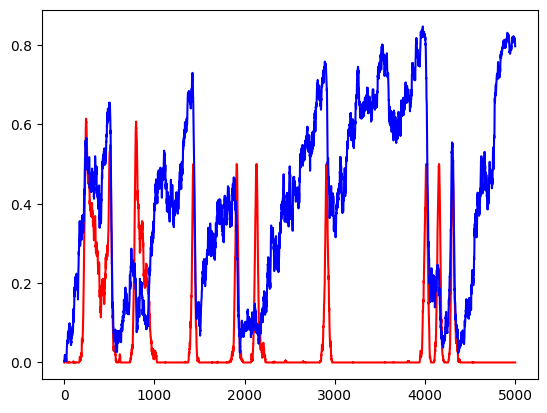

In [ ]:
import matplotlib.pyplot as plt
plt.plot(selected_het[N:], color='red', label='Selected site')
plt.plot(linked_het[N:], color='blue', label='Linked site')